In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
sns.set()

Read data from file

In [2]:
all_tracks_df = pd.read_pickle("../data/spotify_dataset_all.pkl")

In [3]:
all_tracks_df.head()

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1upQiytDIEZfl9ItruoXuC,classical,0.0939,0.03360,2,-24.041,0,0.0606,0.927,0.830,0.0954,0.0516,67.359,207267,3
5bu9A6uphPWg39RC3ZKeku,classical,0.4540,0.01390,4,-29.966,0,0.0514,0.995,0.943,0.0736,0.2440,130.253,184853,4
3DNRdudZ2SstnDCVKFdXxG,classical,0.1840,0.00527,1,-37.264,0,0.0432,0.995,0.887,0.1730,0.1510,170.612,315427,3
67TCAXIe154ZGDNaWceqxC,classical,0.1590,0.04010,7,-27.516,1,0.0446,0.984,0.760,0.1560,0.1060,106.239,462627,4
1Oo7XEqkrwifJn17aA0ocF,classical,0.2990,0.00626,9,-30.923,1,0.0478,0.994,0.901,0.0823,0.0634,69.043,378733,4


Normalise values

In [4]:
normalised_vals_df = all_tracks_df.loc[:, all_tracks_df.columns != 'genre']
normalised_vals_df = (normalised_vals_df - normalised_vals_df.min())/(normalised_vals_df.max() - normalised_vals_df.min())
all_tracks_df = pd.merge(all_tracks_df[['genre']], normalised_vals_df, left_index=True, right_index=True)
all_tracks_df.head()

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1upQiytDIEZfl9ItruoXuC,classical,0.035683,0.032810,0.181818,0.441113,0.0,0.101165,0.930723,0.845214,0.084732,0.029023,0.148602,0.084694,0.50
5bu9A6uphPWg39RC3ZKeku,classical,0.426247,0.013053,0.363636,0.308423,0.0,0.076801,0.998996,0.960285,0.062150,0.229169,0.521763,0.062907,0.75
3DNRdudZ2SstnDCVKFdXxG,classical,0.133406,0.004398,0.090909,0.144985,0.0,0.055085,0.998996,0.903259,0.165113,0.132425,0.761220,0.189824,0.50
67TCAXIe154ZGDNaWceqxC,classical,0.106291,0.039328,0.636364,0.363290,1.0,0.058792,0.987952,0.773931,0.147504,0.085613,0.379284,0.332902,0.75
1Oo7XEqkrwifJn17aA0ocF,classical,0.258134,0.005391,0.818182,0.286991,1.0,0.067267,0.997992,0.917515,0.071162,0.041298,0.158594,0.251357,0.75


Change all genres except jazz to other

In [5]:
all_tracks_df.loc[all_tracks_df['genre'] != 'jazz', 'genre'] = 'other'

Look at genre distribution

<AxesSubplot:ylabel='genre'>

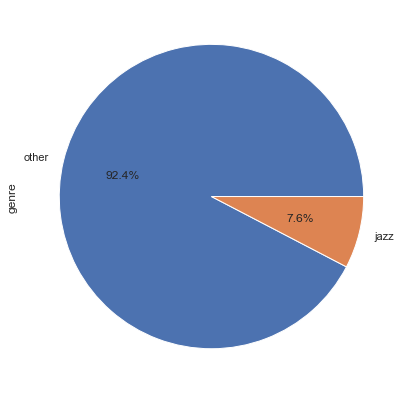

In [6]:
all_tracks_df['genre'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(7,7))

In [7]:
all_tracks_df['genre'].value_counts()

other    6102
jazz      505
Name: genre, dtype: int64

Resample data

In [8]:
pop_sample_df = all_tracks_df.loc[all_tracks_df['genre'] == 'jazz'].sample(n=500, random_state=1)
other_sample_df = all_tracks_df.loc[all_tracks_df['genre'] == 'other'].sample(n=500, random_state=1)
resampled_tracks_df = pd.concat([pop_sample_df, other_sample_df])
resampled_tracks_df

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
6linBr32WmoP56Y2N26isX,jazz,0.536876,0.335082,0.000000,0.570107,1.0,0.090307,0.780120,0.000073,0.193081,0.359201,0.436741,0.434753,0.75
0O727spQJQDjTLEBnnchAG,jazz,0.422993,0.230781,0.727273,0.554968,1.0,0.052701,0.859437,0.923625,0.366066,0.055134,0.363430,0.326655,0.75
5F8rPLt2c52p0SK7kiH26b,jazz,0.154013,0.017766,0.818182,0.435827,0.0,0.048729,0.988956,0.383910,0.061322,0.025382,0.203377,0.286609,0.75
3Y0LpU5kqQ3vSZvwcGjl1M,jazz,0.566161,0.376200,0.545455,0.735091,1.0,0.055350,0.727911,0.255601,0.052414,0.614064,0.465160,0.094517,0.75
6742DFLS3ImdjUgM6poonl,jazz,0.652928,0.373192,0.727273,0.759837,1.0,0.027807,0.791164,0.132383,0.137145,0.622386,0.504770,0.186662,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2KpqVE0AuyI3gGERKuWT6r,other,0.639913,0.821485,0.636364,0.857434,1.0,0.026483,0.010238,0.006120,0.053139,0.367523,0.508134,0.102098,0.75
2hrUO4drrO63i7FYbCLBl2,other,0.711497,0.731225,0.818182,0.873603,0.0,0.091102,0.384536,0.000000,0.398177,0.799230,0.354145,0.127370,0.75
5fIZDuxfuM4tANRHZ8Btju,other,0.253796,0.834523,0.818182,0.794101,0.0,0.143008,0.014053,0.069552,0.070437,0.625507,0.773940,0.216793,0.75
22nyEAEM29tcBRhukR089b,other,0.786334,0.821485,0.818182,0.865451,0.0,0.555085,0.222889,0.000000,0.581521,0.485072,0.460823,0.098038,0.75


<AxesSubplot:ylabel='genre'>

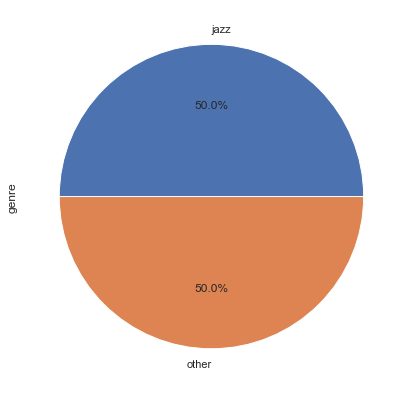

In [9]:
resampled_tracks_df['genre'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(7,7))

See summary statistics

In [10]:
resampled_tracks_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.531888,0.440948,0.478727,0.708135,0.582000,0.122180,0.534758,0.300307,0.160592,0.423850,0.437673,0.154992,0.725000
std,0.177895,0.277391,0.324253,0.146938,0.493477,0.174086,0.382536,0.385087,0.147321,0.255451,0.177060,0.102836,0.106119
min,0.007267,0.004317,0.000000,0.120350,0.000000,0.002648,0.000090,0.000000,0.010151,0.009050,0.041473,0.000000,0.000000
25%,0.407809,0.186403,0.181818,0.608806,0.000000,0.036745,0.101152,0.000004,0.084110,0.195881,0.306494,0.080154,0.750000
50%,0.530369,0.434368,0.454545,0.729996,1.000000,0.058263,0.635039,0.009822,0.106070,0.411734,0.431330,0.129536,0.750000
75%,0.661605,0.681080,0.727273,0.830359,1.000000,0.102820,0.920933,0.746690,0.172364,0.622906,0.535428,0.212656,0.750000
max,0.990239,0.992980,1.000000,0.973619,1.000000,0.997352,1.000000,0.987780,0.997928,0.982316,0.962520,0.936444,1.000000


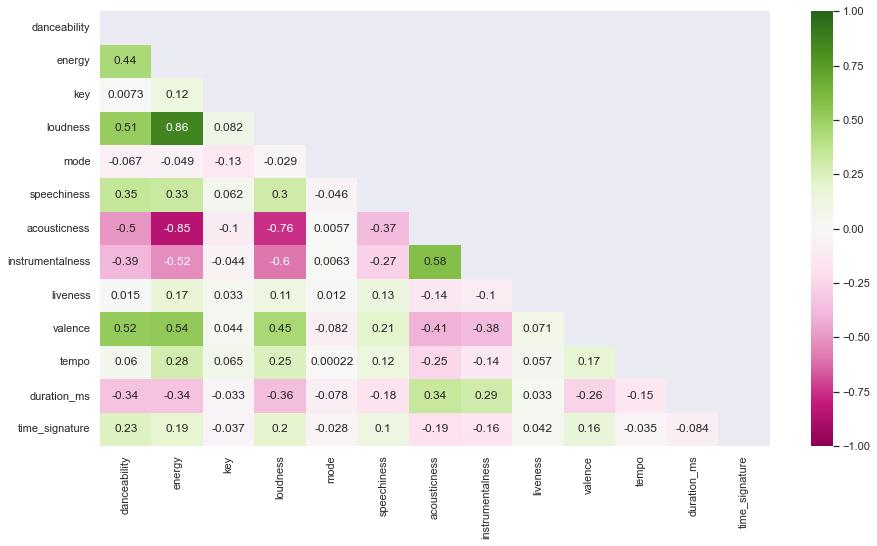

In [11]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(resampled_tracks_df.corr(), dtype=bool))
sns.heatmap(resampled_tracks_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="PiYG");

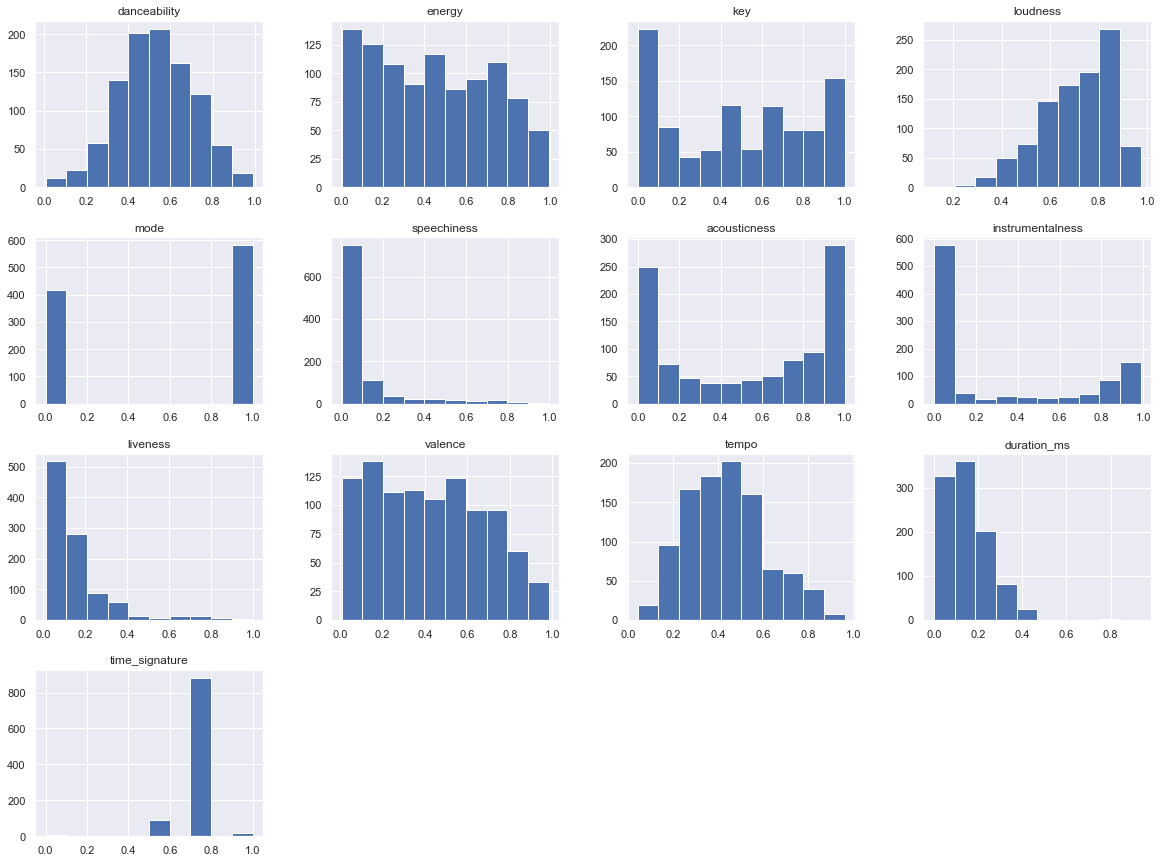

In [12]:
resampled_tracks_df.hist(figsize=(20,15));

Split data

In [13]:
# Feature variables
X = resampled_tracks_df.loc[:, resampled_tracks_df.columns != 'genre']
# Target variable
y = resampled_tracks_df['genre']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Decision Tree

In [15]:
dt_clf = DecisionTreeClassifier(random_state=1)
dt_clf = dt_clf.fit(X_train, y_train)

c:\Users\JD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


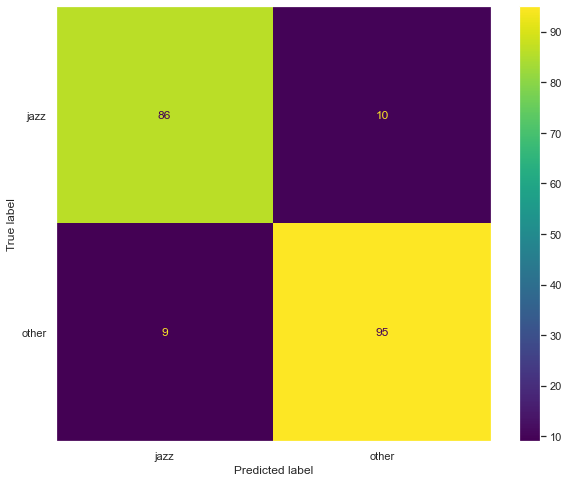

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
plt.grid(False)
metrics.plot_confusion_matrix(dt_clf, X_test, y_test, display_labels=dt_clf.classes_, ax=ax);


Pruning decision tree

In [17]:
path = dt_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]

dt_clfs = []

for ccp_alpha in ccp_alphas:
    dt_clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    dt_clf.fit(X_train, y_train)
    dt_clfs.append(dt_clf)

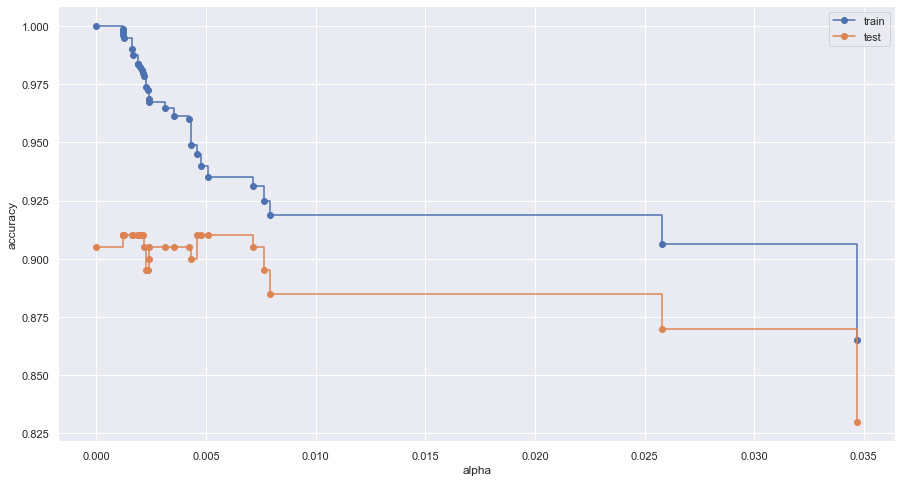

In [18]:
train_scores = [dt_clf.score(X_train, y_train) for dt_clf in dt_clfs]
test_scores = [dt_clf.score(X_test, y_test) for dt_clf in dt_clfs]

fig, ax = plt.subplots(figsize=(15,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()

In [19]:
best_ccp = ccp_alphas[np.argmax(test_scores)]
best_ccp

0.0011904761904761908

Cross Validation

<AxesSubplot:xlabel='tree'>

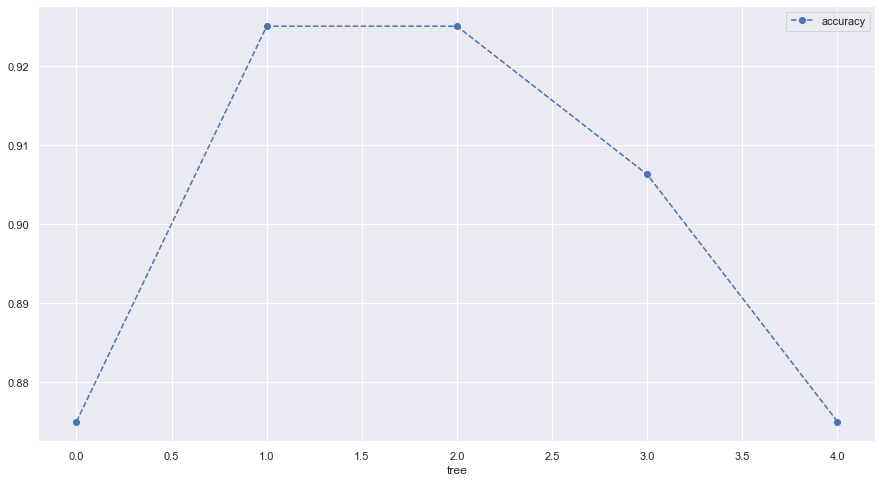

In [20]:
dt_clf = DecisionTreeClassifier(random_state=1, ccp_alpha=best_ccp)
scores = cross_val_score(dt_clf, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})
fig, ax = plt.subplots(figsize=(15,8))
df.plot(x='tree', y='accuracy', marker='o', linestyle='--', ax=ax)

Above shows alpha is sensitive to different training/testing data.

<AxesSubplot:xlabel='alpha'>

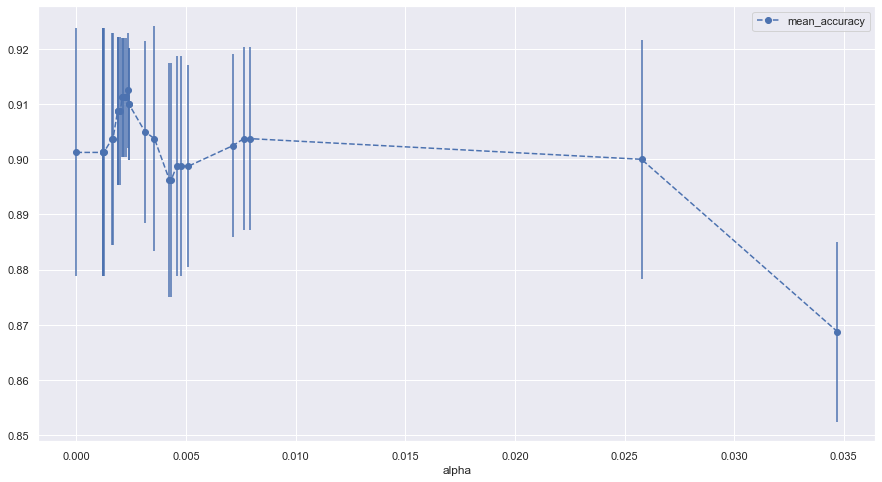

In [21]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    dt_clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    scores = cross_val_score(dt_clf, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])
fig, ax = plt.subplots(figsize=(15,8))
alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--', ax=ax)

In [22]:
ideal_ccp = alpha_results.iloc[alpha_results['mean_accuracy'].idxmax()]['alpha']
ideal_ccp

0.002352941176470589

Building final tree

c:\Users\JD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


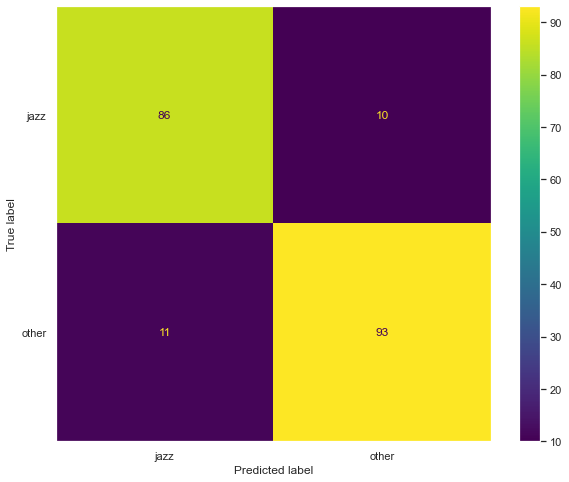

In [23]:
dt_clf_pruned = DecisionTreeClassifier(random_state=1, ccp_alpha=ideal_ccp)
dt_clf_pruned = dt_clf_pruned.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(10,8))
plt.grid(False)
metrics.plot_confusion_matrix(dt_clf_pruned, X_test, y_test, display_labels=dt_clf_pruned.classes_, ax=ax);

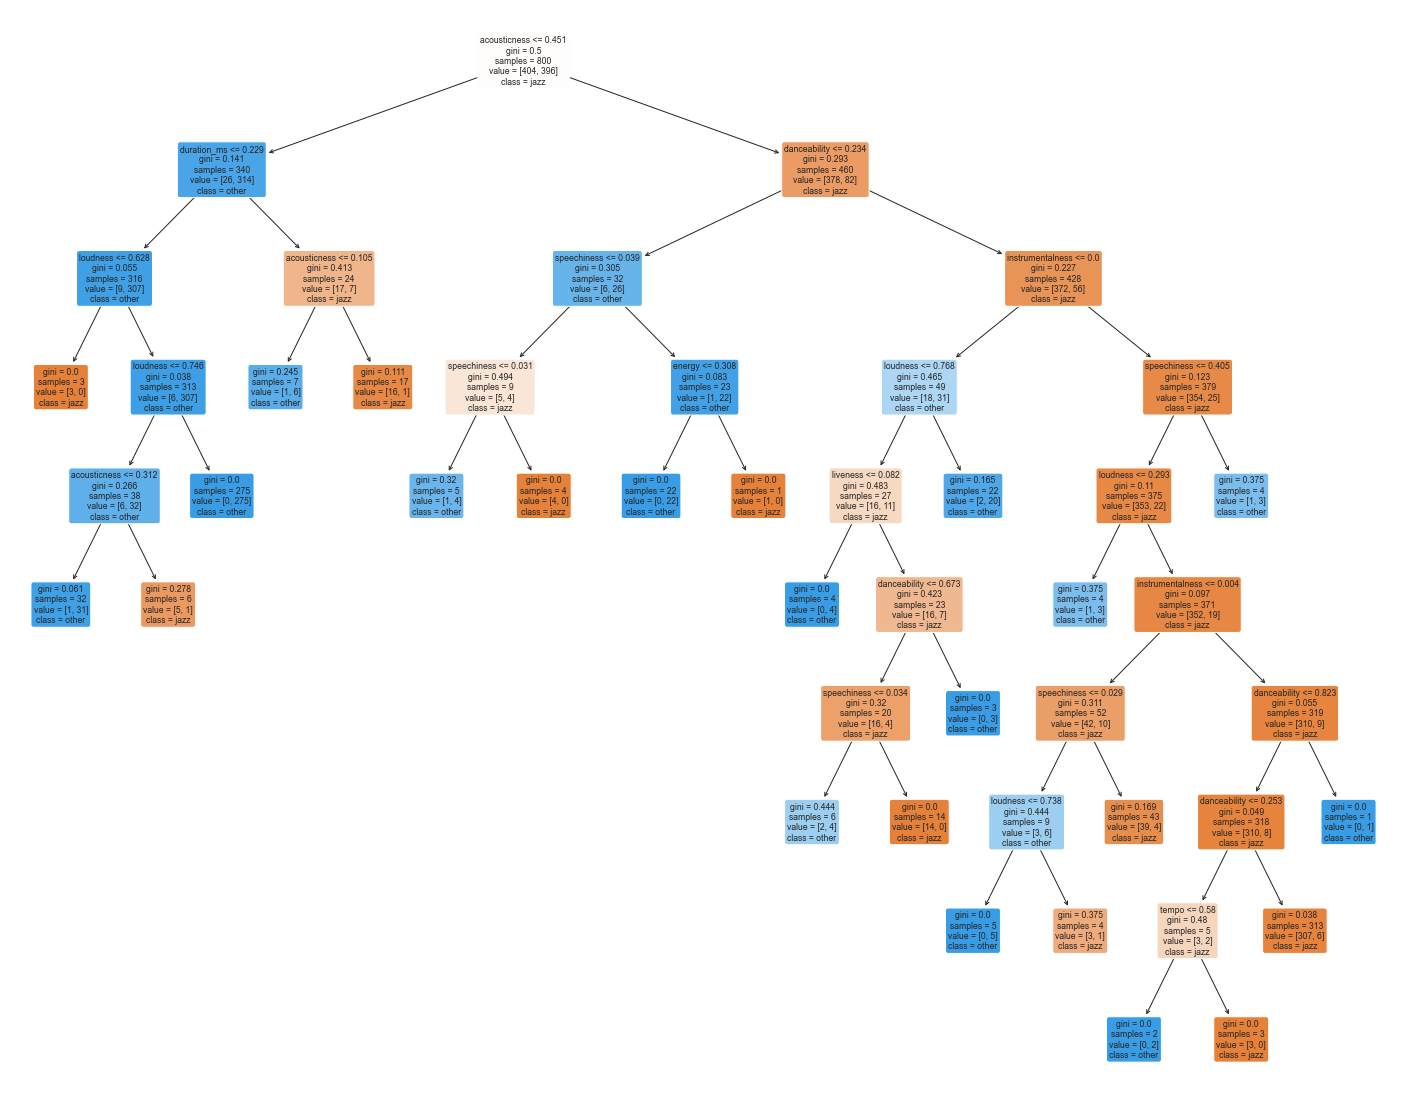

In [24]:
plt.figure(figsize=(25,20))
plot_tree(dt_clf_pruned, filled=True, rounded=True, class_names=dt_clf_pruned.classes_, feature_names=X.columns);

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [26]:
df = pd.read_pickle("../data/spotify_dataset_all.pkl")
df.loc[df['genre'] != 'jazz', 'genre'] = 0
df.loc[df['genre'] == 'jazz', 'genre'] = 1
df['genre'] = df['genre'].astype(int)
pdf = df.loc[df['genre'] == 1].sample(n=500, random_state=1)
odf = df.loc[df['genre'] == 0].sample(n=500, random_state=1)
df = pd.concat([pdf, odf])
df

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
6linBr32WmoP56Y2N26isX,1,0.556,0.3350,0,-18.281,1,0.0565,0.7770,0.000072,0.2000,0.3690,115.923,567413,4
0O727spQJQDjTLEBnnchAG,1,0.451,0.2310,8,-18.957,1,0.0423,0.8560,0.907000,0.3670,0.0767,103.567,456200,4
5F8rPLt2c52p0SK7kiH26b,1,0.203,0.0186,9,-24.277,0,0.0408,0.9850,0.377000,0.0728,0.0481,76.591,415000,4
3Y0LpU5kqQ3vSZvwcGjl1M,1,0.583,0.3760,6,-10.914,1,0.0433,0.7250,0.251000,0.0642,0.6140,120.713,217373,4
6742DFLS3ImdjUgM6poonl,1,0.663,0.3730,8,-9.809,1,0.0329,0.7880,0.130000,0.1460,0.6220,127.389,312173,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2KpqVE0AuyI3gGERKuWT6r,0,0.651,0.8200,7,-5.451,1,0.0324,0.0102,0.006010,0.0649,0.3770,127.956,225173,4
2hrUO4drrO63i7FYbCLBl2,0,0.717,0.7300,9,-4.729,0,0.0568,0.3830,0.000000,0.3980,0.7920,102.002,251173,4
5fIZDuxfuM4tANRHZ8Btju,0,0.295,0.8330,9,-8.279,0,0.0764,0.0140,0.068300,0.0816,0.6250,172.756,343173,4
22nyEAEM29tcBRhukR089b,0,0.786,0.8200,9,-5.093,0,0.2320,0.2220,0.000000,0.5750,0.4900,119.982,220996,4


In [27]:
X = df.loc[:, df.columns != 'genre']
y = df['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [28]:
lr = sm.Logit(y_train, X_train).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.315554
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  genre   No. Observations:                  800
Model:                          Logit   Df Residuals:                      787
Method:                           MLE   Df Model:                           12
Date:                Thu, 02 Jun 2022   Pseudo R-squ.:                  0.5447
Time:                        15:29:49   Log-Likelihood:                -252.44
converged:                       True   LL-Null:                       -554.48
Covariance Type:            nonrobust   LLR p-value:                1.434e-121
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
danceability        -0.0526      0.906     -0.058      0.954      -1.829       1.723
energy              -4.6695      1.002     -4.661      0.000      -6.633      -2.706
key                 -0.0649      0.034     -1.927      0.054      -0.131       0.001
loudness             0.1103      0.033      3.295      0.001       0.045       0.176
mode                -0.4269      0.237     -1.801      0.072      -0.891       0.038
speechiness        -13.3272      3.913     -3.406      0.001     -20.996      -5.659
acousticness         4.4083      0.546      8.081      0.000       3.339       5.478
instrumentalness     1.9183      0.411      4.672      0.000       1.114       2.723
liveness             0.3744      0.822      0.455      0.649      -1.237       1.986
valence              4.5521      0.723      6.299      0.000       3.136       5.969
tempo               -0.0070      0.004     -1.838      0.066      -0.014       0.000
duration_ms       3.941e-06    1.2e-06      3.288      0.001    1.59e-06    6.29e-06
time_signature      -0.1682      0.216     -0.779      0.436      -0.591       0.255
====================================================================================
"""